In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url_data = r'C:\Users\Dussand\Desktop\proyectsDS\Python\Machine Learning\ML_proyect\gym_data\gym_churn_us.csv'

In [4]:
#leemos la data
gym_df = pd.read_csv(url_data)

In [5]:
gym_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Llevar a cabo el análisis exploratorio de datos (EDA)

Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

Crea una matriz de correlación y muéstrala.

In [6]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Se puede observaro que no presentmaos ningun valor ausente en ninguna de las columnas, por lo tanto tenemos un dataset lleno.

In [7]:
gym_df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
gym_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [9]:
churn_data = gym_df.groupby('Churn')['Churn'].count().reset_index(name='Count_Churn')
churn_data

,Churn,Count_Churn
0,0,2939
1,1,1061


En base a este grafico se concluye que 2939 personas dejaron el gym mientras que 1061 permanecieron. Lo que resulta algo preocupante que hayan mas personas yendose que viniendo.

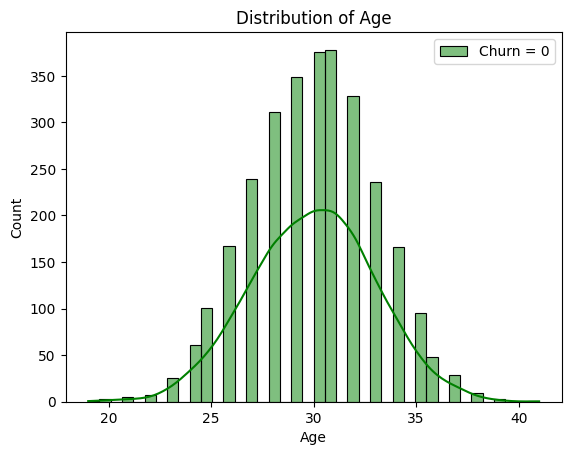

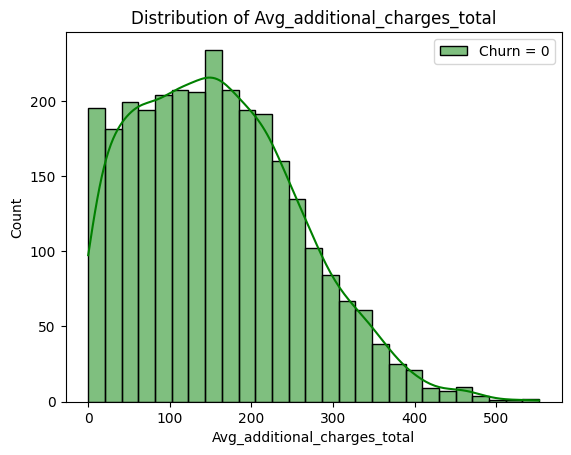

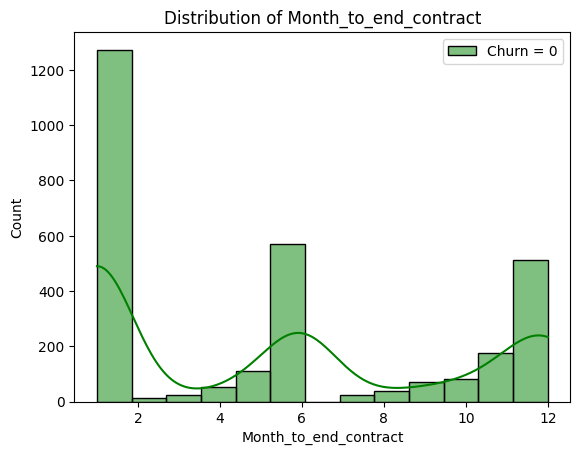

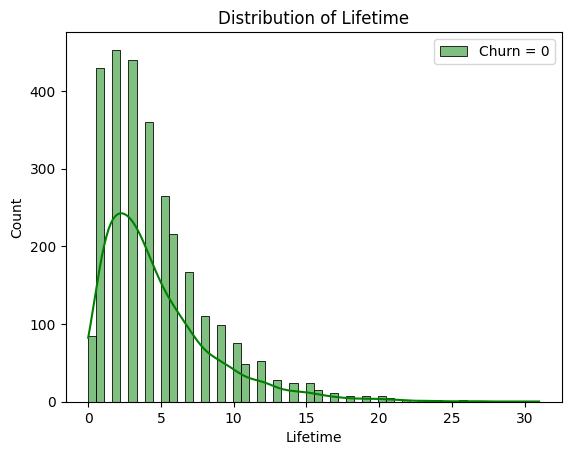

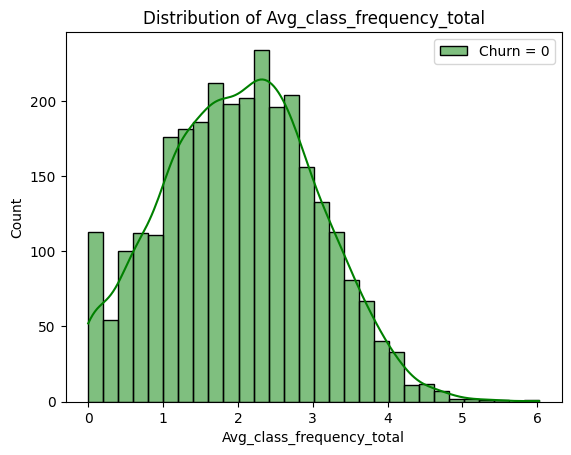

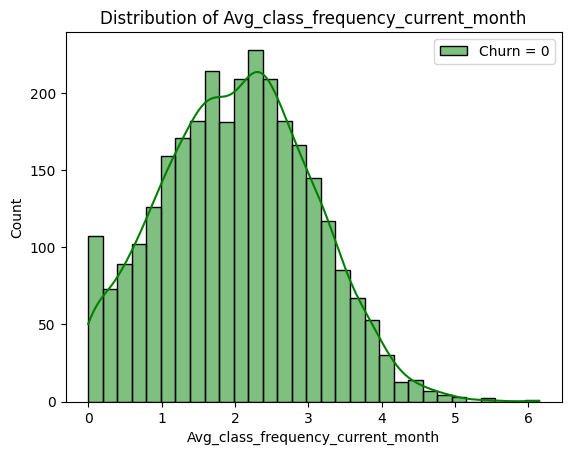

In [10]:
partners_0 = gym_df[gym_df['Churn'] == 0]

# Características a graficar
features = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
            'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for feature in features:
    sns.histplot(partners_0[feature], color='green', label='Churn = 0', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()
    

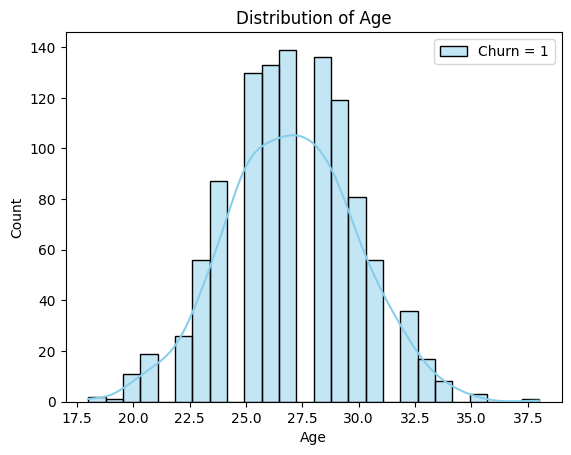

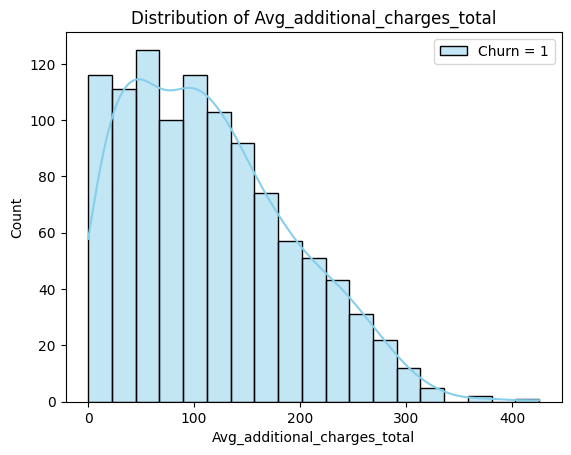

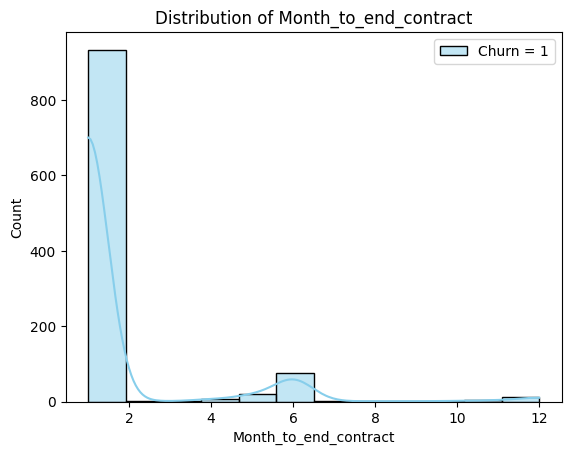

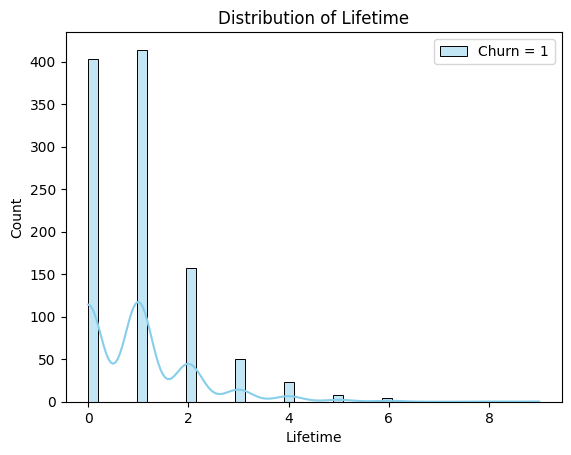

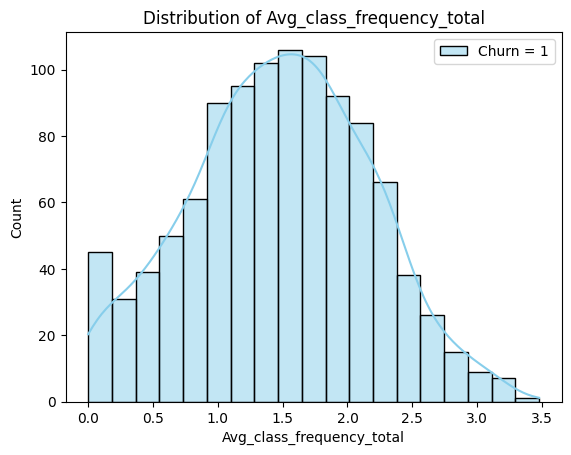

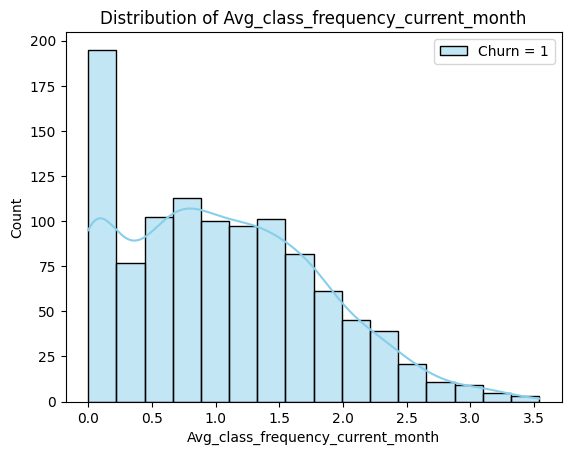

In [11]:
partners_1 = gym_df[gym_df['Churn'] == 1]

# Características a graficar
features = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
            'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for feature in features:
    
    sns.histplot(partners_1[feature], color='skyblue', label='Churn = 1', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()
    

Crea una matriz de correlación y muéstrala.

In [12]:
gymm_corr = gym_df.corr()


<Axes: >

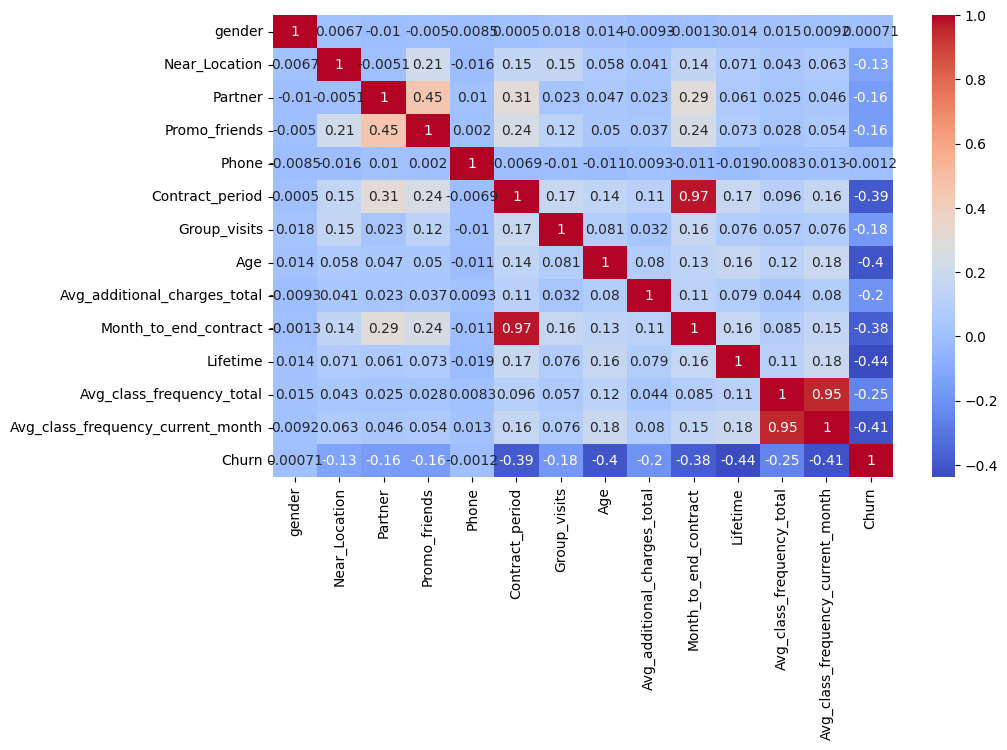

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(gymm_corr, annot=True, cmap='coolwarm')

Las correlaciones fuertes, aquellas con valores mayores al 90% (positivas o negativas), indican una relación lineal muy fuerte entre las variables. Aquí te explico las correlaciones que cumplen con este criterio:

Contract_period y Month_to_end_contract (0.97):
Estas dos variables están altamente correlacionadas porque es lógico que el periodo de contrato y los meses restantes para terminar el contrato estén estrechamente relacionados. A medida que aumenta el periodo total del contrato, es probable que haya más meses restantes hasta su finalización.

Avg_class_frequency_total y Avg_class_frequency_current_month (0.95):
La frecuencia promedio total de clases y la frecuencia promedio de clases en el mes actual están muy correlacionadas. Esto se debe a que la frecuencia total a menudo incluye la del mes actual, lo que hace que los valores se alineen estrechamente. Si alguien tiene una alta frecuencia total, es probable que su frecuencia en el mes actual también sea alta.

## Paso 3. Construir un modelo para predecir la cancelación de usuarios
Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

Entrena el modelo en el set de entrenamiento con dos métodos:
    regresión logística;
    bosque aleatorio.

Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo. 

In [14]:
#importamos las librerias necesarios para construir el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X =gym_df.drop('Churn', axis=1)
y= gym_df['Churn']

# Verificamos las formas de X e y
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)


Forma de X: (4000, 13)
Forma de y: (4000,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [16]:
#entrenamos el modelo de regresion logistica 
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Dussand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
#predicciones para el conjunto de prueba
y_pred_log = model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [19]:
#evaluamos el modelo de regresion logistica
accuracy_score_log = accuracy_score(y_test, y_pred_log)
precision_log_reg = precision_score(y_test, y_pred_log)
recall_log_reg = recall_score(y_test, y_pred_log)


In [20]:
#evaluamos el modelo de random forest
accuracy_score_fr = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

In [21]:
# Comparar modelos
if accuracy_score_log > accuracy_score_fr:
    print("El modelo de Regresión Logística tiene mejor exactitud.")
else:
    print("El modelo de Bosque Aleatorio tiene mejor exactitud.")

if precision_log_reg > precision_rf:
    print("El modelo de Regresión Logística tiene mejor precisión.")
else:
    print("El modelo de Bosque Aleatorio tiene mejor precisión.")

if recall_log_reg > recall_rf:
    print("El modelo de Regresión Logística tiene mejor recall.")
else:
    print("El modelo de Bosque Aleatorio tiene mejor recall.")

El modelo de Bosque Aleatorio tiene mejor exactitud.
El modelo de Bosque Aleatorio tiene mejor precisión.
El modelo de Bosque Aleatorio tiene mejor recall.


In [22]:
# Mostrar resultados
print("Resultados del Modelo de Regresión Logística:")
print(f"Exactitud: {accuracy_score_log:.4f}")
print(f"Precisión: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}\n")

print("Resultados del Modelo de Bosque Aleatorio:")
print(f"Exactitud: {accuracy_score_fr:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}\n")

Resultados del Modelo de Regresión Logística:
Exactitud: 0.9113
Precisión: 0.8256
Recall: 0.8131

Resultados del Modelo de Bosque Aleatorio:
Exactitud: 0.9163
Precisión: 0.8394
Recall: 0.8182



## Paso 4. Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

Estandariza los datos.

Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar 
tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

Traza distribuciones de características para los clústeres. ¿Notas algo?

Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [23]:
#eliminamos la columna churn

gym_no_churn = gym_df.drop('Churn', axis = 1)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaler = scaler.fit_transform(gym_no_churn)

df_scaler

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

In [25]:
# Convertimos el resultado a un DataFrame para facilitar su uso posterior
data_scaled_df = pd.DataFrame(df_scaler, columns=gym_no_churn.columns)
data_scaled_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542


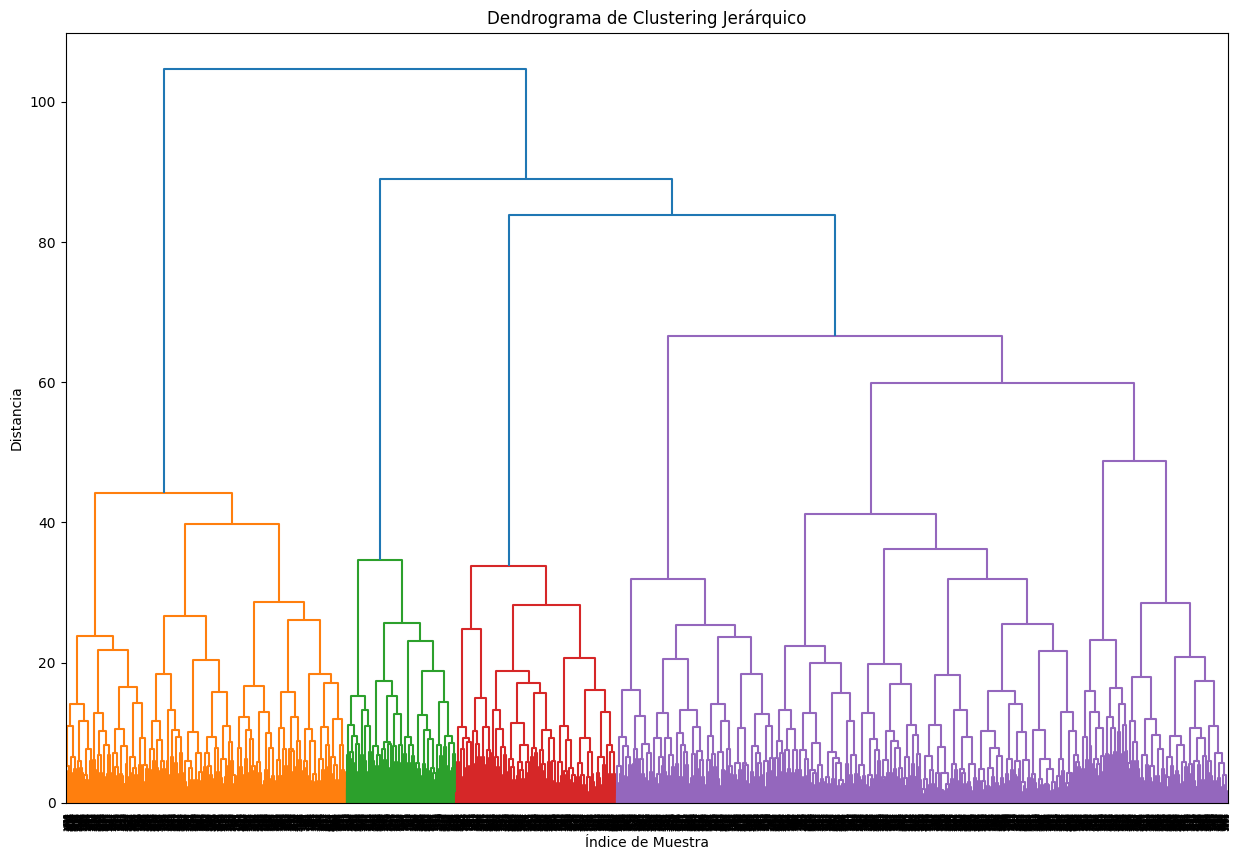

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(data_scaled_df, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(Z, orientation='top')
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [27]:
#entrenamos el modelo de clustering k-means
from sklearn.cluster import KMeans

In [28]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(df_scaler)

c:\Users\Dussand\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dussand\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [29]:
labels

array([1, 2, 3, ..., 2, 1, 2], dtype=int32)

In [30]:
gym_df['cluster_churn'] = labels

In [31]:
gym_df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,2
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,2
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,1


In [32]:
clusters = gym_df.groupby(['cluster_churn']).mean()
clusters

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_churn,,,,,,,,,,,,,,
0,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368
1,0.486068,0.998452,0.823529,1.000000,0.899381,3.165635,0.456656,29.224458,141.868789,2.927245,3.739938,1.742540,1.636485,0.246130
2,0.498932,0.944444,0.740385,0.485043,0.900641,11.884615,0.551282,29.931624,164.625700,10.877137,4.674145,1.999110,1.990516,0.022436
3,0.488708,1.000000,0.242999,0.020777,0.902439,1.986450,0.320687,28.209575,131.151639,1.902439,2.391147,1.272203,1.029702,0.526649
4,0.585398,0.971317,0.259452,0.089961,0.903520,2.809648,0.477184,30.142112,161.875250,2.588005,5.147327,2.880231,2.881432,0.069100


In [41]:
def show_clusters_on_plot(df, y_name, cluster_name):
    features_avg = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
            'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
    for feature in features_avg:
            plt.figure(figsize = (10,10))
            sns.scatterplot(data=df, x=feature, y=y_name, hue=cluster_name, palette='Paired')
            plt.title('{} vs {}'.format(feature, y_name))
            plt.show()


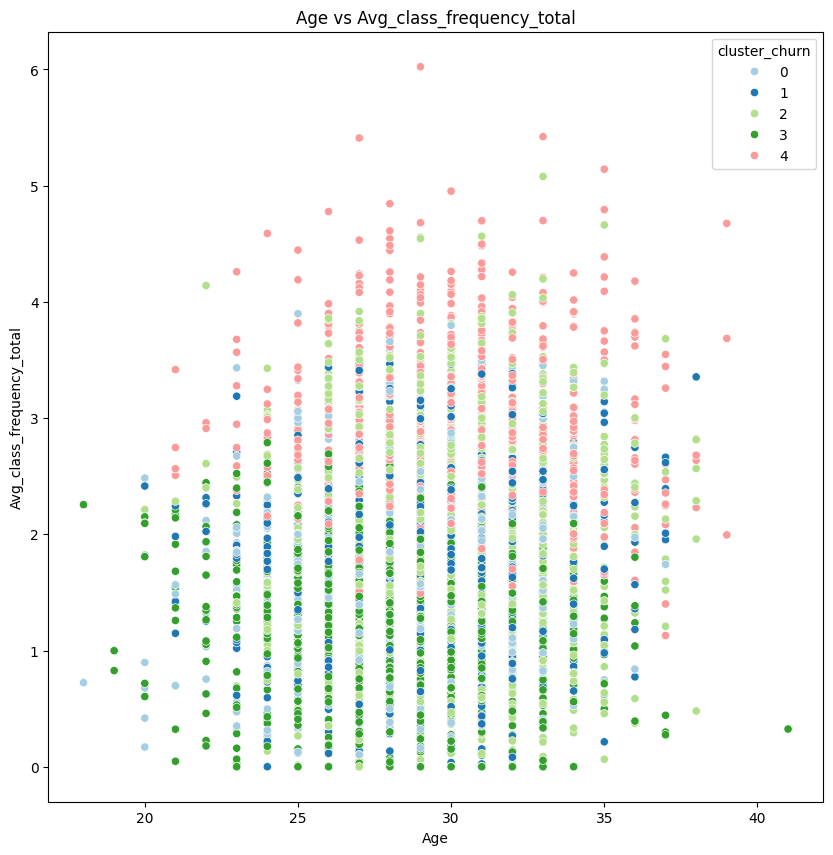

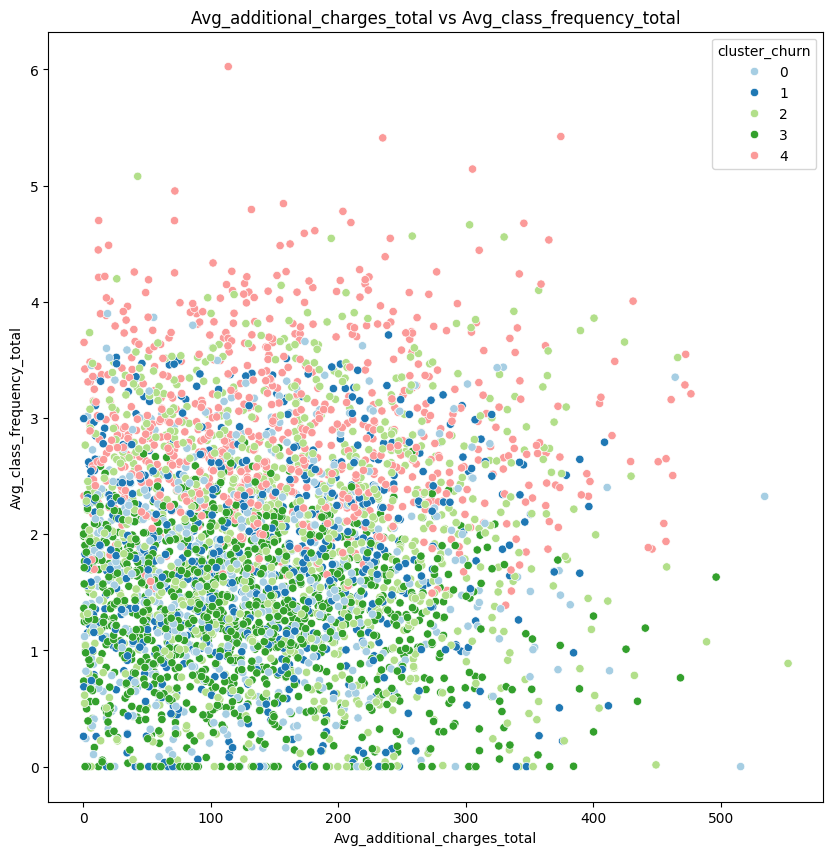

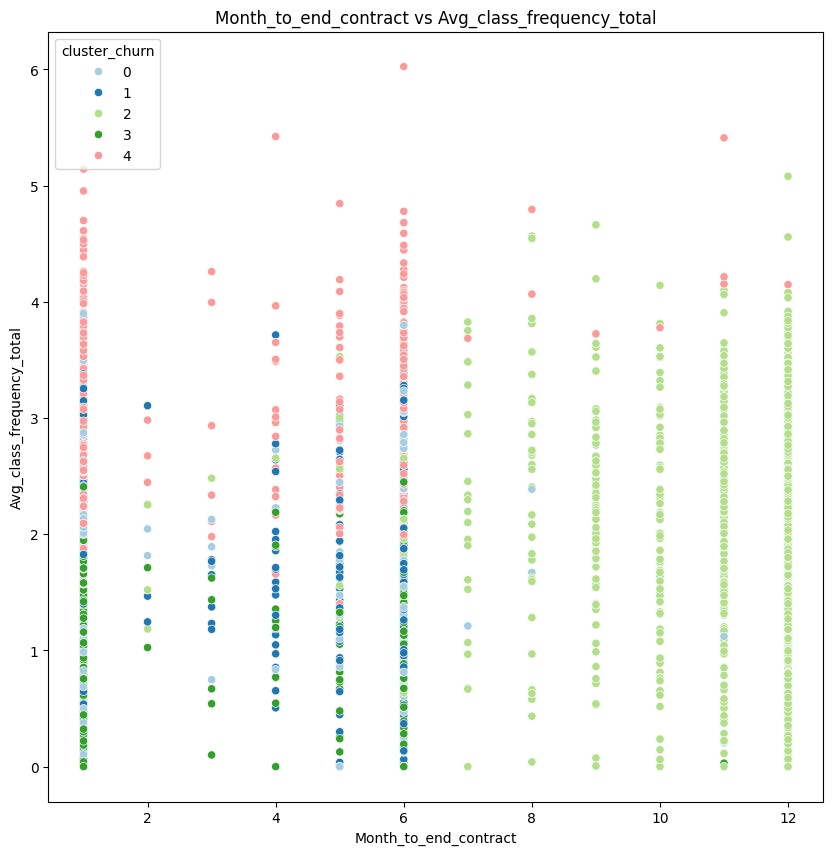

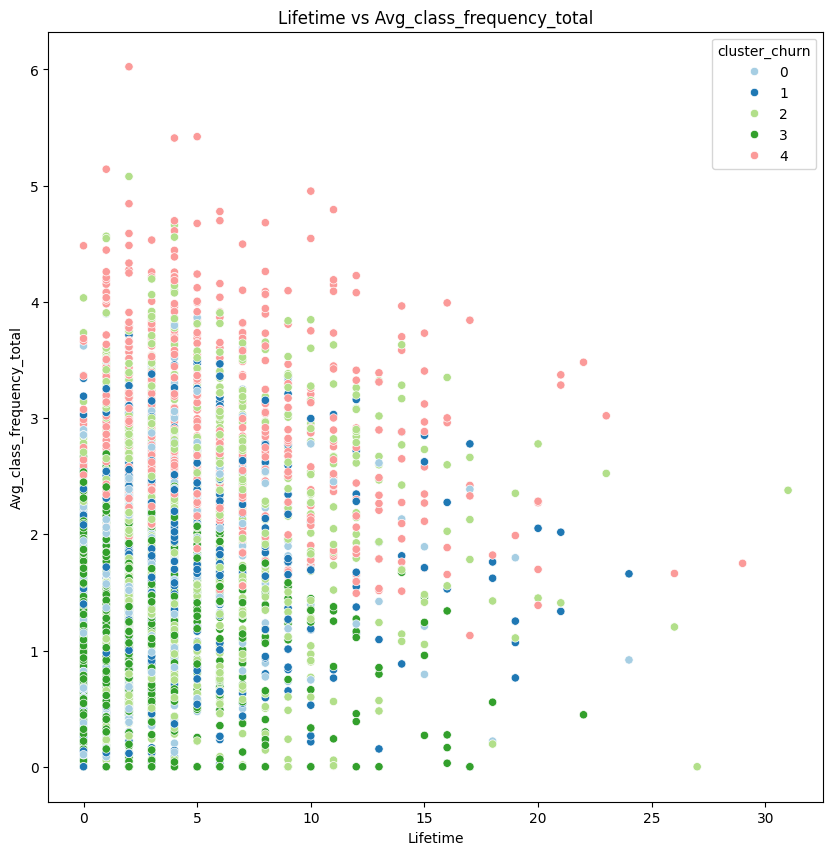

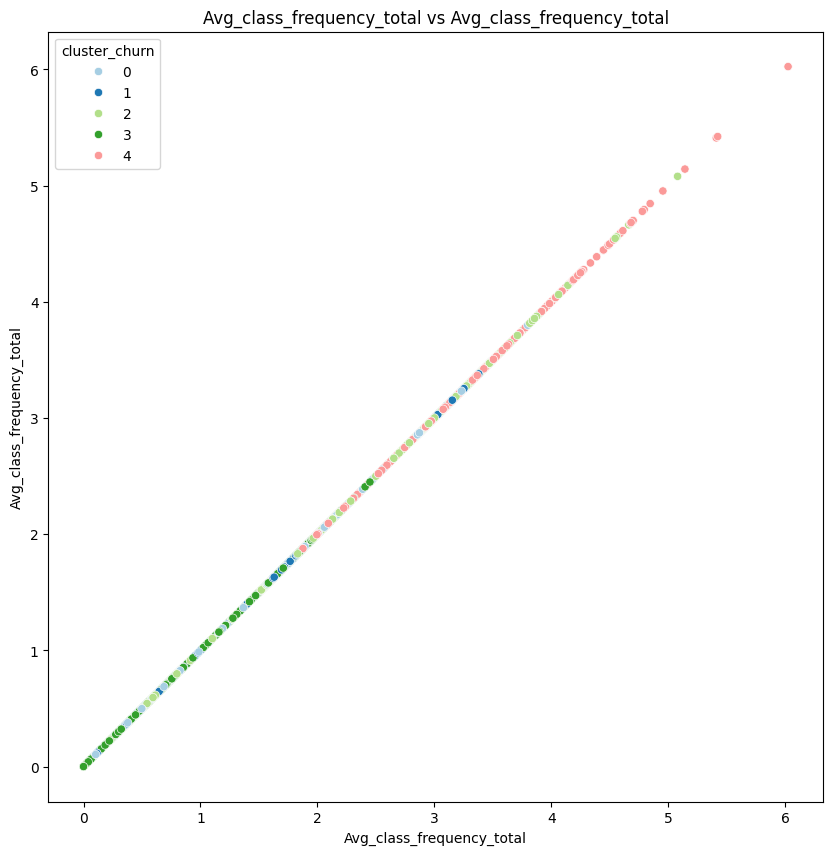

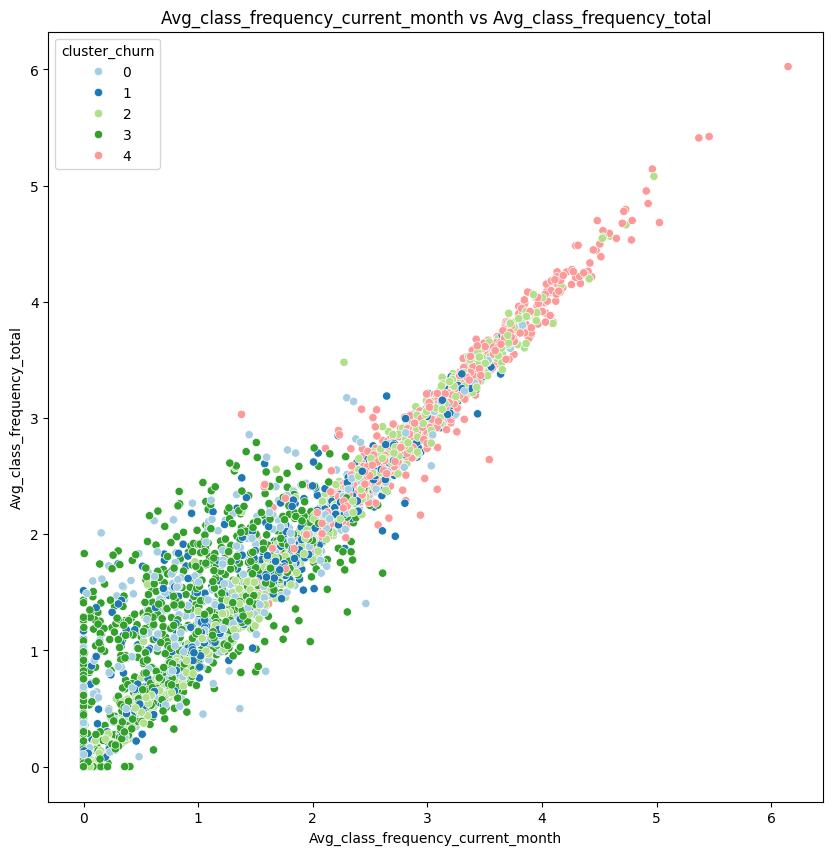

In [43]:
show_clusters_on_plot(gym_df, 'Avg_class_frequency_total', 'cluster_churn')

In [63]:
#calculamos la tasa de cancelacion de cada cluster
churn_rate = (gym_df.groupby('cluster_churn')['Churn'].mean()).reset_index().sort_values(by = 'Churn',ascending=False)

In [64]:
churn_rate

,cluster_churn,Churn
3,3,0.526649
0,0,0.450368
1,1,0.246130
4,4,0.069100
2,2,0.022436


## CONCLUSIONES

Con base en las tasas de cancelación calculadas para cada clúster:

Clúster 3 tiene la tasa de cancelación más alta con un 52.66%, lo que indica que este grupo es el más propenso a irse.

Clúster 0 también presenta una tasa relativamente alta con un 45.04%, lo que sugiere que es otro grupo en riesgo de cancelación.

Clúster 1 tiene una tasa de 24.61%, lo que muestra una menor propensión a cancelar en comparación con los anteriores.

Clúster 4 presenta una tasa baja de 6.91%, lo que indica que sus miembros son mayormente leales.

Clúster 2 es el más leal, con la tasa de cancelación más baja de 2.24%.

## RECOMENDACIONES

Enfocarnos en un mejor fidelizacion, o en su defecto, fidelizacion con los clusteres 3 y 0: 

Por ejemplo una campaña de email pesonalizados invitando a ser parte de algunos beneficios exlcusivos a los clientes de estos clusteres para una retenecion mas eficiente. 

Una recompensa por la lealtada a los clientes del cluster 2:

Se puede crear un programa de mejores beneficios o recompensas para estos clientes, como decuentos, productos adicionales para mejoras. Todo esto para reforzar su fidelidad

Hacer un seguimiento y mejora de experiencia a los clusteres 1 y 4:

Se pueden hacer encuestas que muestren la satisfaccion de los clientes de estos clusters y hacer algunos ajustes de acuerdo a las sugerencias a estos clientes para que este mas agusto en el gym y evitar que fuguen. 